# Comparision between simple model and CNN model 
### We have used MNIST dataset for this comparision

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing mnist(hand written digits 0-9) datasets
from tensorflow.keras.datasets import mnist
(trainX , trainY) , (testX,testY) = mnist.load_data()

In [3]:
#check the shapes of data
print("Trainig features shape : " , trainX.shape)
print("Training labels shape : " , trainY.shape)

Trainig features shape :  (60000, 28, 28)
Training labels shape :  (60000,)


In [4]:
#check the testing data
print("Testing features shape : " , testX.shape)
print("Testing label shape : ",testY.shape)

Testing features shape :  (10000, 28, 28)
Testing label shape :  (10000,)


Following image class :  4




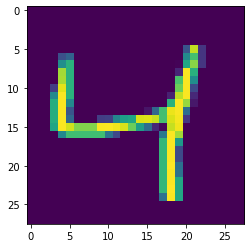

In [5]:
random_idx=2 #You can change this index to show other images
label = trainY[random_idx]
plt.imshow(trainX[random_idx])
print("Following image class : ",label,end="\n\n\n")

In [6]:
#We have to reshape our features data ,technically we have to add an axis to our dataset
trainX = np.expand_dims(trainX,axis=-1)
print("After reshaping training features ,shape = " , trainX.shape)
testX = np.expand_dims(testX,axis=-1)
print("After reshaping testing features ,shape = " , testX.shape)

After reshaping training features ,shape =  (60000, 28, 28, 1)
After reshaping testing features ,shape =  (10000, 28, 28, 1)


In [7]:
batch_size =64
output_shape=10 # 0-9 digits
input_shape = trainX.shape[1:]
print(input_shape)

(28, 28, 1)


In [8]:
# This is a time to specify architecture
from tensorflow.keras import models , layers 
mnist_model = models.Sequential([
    layers.Flatten(input_shape=input_shape) ,
    layers.Dense(units=16,activation="tanh"),
    layers.Dense(units=32,activation="tanh"),
    layers.Dense(units=64,activation="tanh"),
    layers.Dense(units=64,activation="tanh"),
    layers.Dense(units=output_shape,activation="softmax")
])
print(mnist_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 20,026
Trainable params: 20,026
Non-trainable params: 0
____________________________________________________

In [9]:
#lets compile our model
mnist_model.compile(loss="sparse_categorical_crossentropy" , optimizer=tf.optimizers.Adam(learning_rate=0.001) , metrics=["accuracy"])

In [10]:
tensorboard_log_dir = "/log_dir/mnist_logs/"
callbacks = tf.keras.callbacks.TensorBoard(log_dir=tensorboard_log_dir,histogram_freq=1)

In [11]:
# lets train model on our data
epochs=10
mnist_history = mnist_model.fit(trainX,trainY , epochs=epochs , callbacks=callbacks)

Epoch 1/10
   1/1875 [..............................] - ETA: 1s - loss: 2.2661 - accuracy: 0.2188WARNING:tensorflow:From C:\Users\ankur\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8942 - accuracy: 0.7007
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6865 - accuracy: 0.7751
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6561 - accuracy: 0.7829
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5625 - accuracy: 0.8188
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5483 - accuracy: 0.8235
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5401 - accuracy: 0.8271
Ep

In [12]:
# evaluate on test dataset.
test_loss , test_accuracy = mnist_model.evaluate(testX,testY)

313/313 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.8587


In [13]:
print("Test Loss : ",test_loss)
print("Test accuracy : " , test_accuracy)

Test Loss :  0.4514050781726837
Test accuracy :  0.8586999773979187


Well, we are doing good with simple dense neural network

In [14]:
#lets now use cnn 

In [15]:
mnist_cnn = models.Sequential([
    layers.Conv2D(filters=16 , kernel_size=(2,2) , activation="relu" ,input_shape=input_shape),
    layers.MaxPooling2D() ,
    layers.Conv2D(filters=32,kernel_size=(2,2) , activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(units=output_shape,activation="softmax")
])
print(mnist_cnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 16)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                11530     
Total params: 13,690
Trainable params: 13,690
Non-trainable params: 0
__________________________________________________

In [16]:
mnist_cnn.compile(loss="sparse_categorical_crossentropy" , optimizer="adam" , metrics=["accuracy"])

In [17]:
cnn_history=mnist_cnn.fit(trainX,trainY,epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6934 - accuracy: 0.9252
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0964 - accuracy: 0.9721
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0678 - accuracy: 0.9794
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0561 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0487 - accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0413 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0365 - accuracy: 0.9883
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0326 - accuracy: 0.9894
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0304 - accuracy: 0.9901
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.025

In [18]:
scores=mnist_cnn.evaluate(testX,testY)

313/313 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9837


In [19]:
print("Using CNN , we got Accuracy = " , scores[1])

Using CNN , we got Accuracy =  0.9836999773979187


In [20]:
#lets plot graphs
dense_acc = mnist_history.history["accuracy"]
dense_loss= mnist_history.history["loss"]
cnn_acc  = cnn_history.history["accuracy"]
cnn_loss = cnn_history.history["loss"]
x_map = [i for i in range(epochs)]

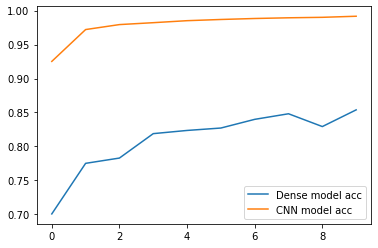

In [21]:
plt.plot(x_map,dense_acc,cnn_acc)
plt.legend(["Dense model acc","CNN model acc"])

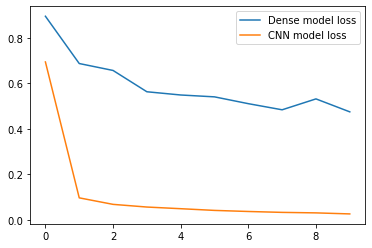

In [22]:
plt.plot(x_map,dense_loss,cnn_loss)
plt.legend(["Dense model loss","CNN model loss"])

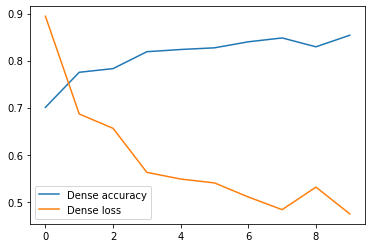

In [23]:
plt.plot(x_map,dense_acc,dense_loss)
plt.legend(["Dense accuracy","Dense loss"])

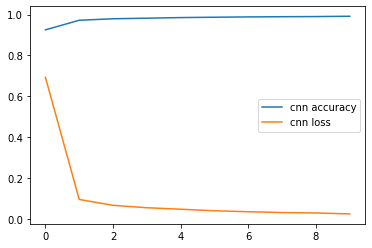

In [24]:
plt.plot(x_map,cnn_acc,cnn_loss)
plt.legend(["cnn accuracy","cnn loss"])

### Start testing here 

In [25]:
def predict(image,idx): #use this function to 
    image=np.expand_dims(image,axis=0)
    plt.imshow(testX[idx])
    cnn_pred =mnist_cnn.predict(image)
    cnn_argmax=np.argmax(cnn_pred)
    dense_pred=mnist_model.predict(image)
    dense_argmax=np.argmax(dense_pred)
    print("Prediction CNN model = ",cnn_argmax)
    print("Prediction Dense model = ",dense_argmax)

Prediction CNN model =  2
Prediction Dense model =  2


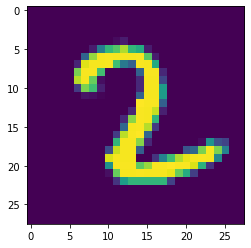

In [26]:
random_idx=2133
predict(testX[random_idx],random_idx)